## Imports

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Loading the data

In [71]:
dataset = pd.read_csv('./data/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [73]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Splitting data into train/test subsets

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Fitting (training) simple linear model (from scratch, using normal equation)

![image.png](attachment:image.png)

In [74]:
class LinearRegression:
    
    def train(self, X, y):
        X_b = np.c_[np.ones((len(X_train), 1)), X_train] # add bias to each instance
        theta_best = X_b.T.dot(X_b)
        theta_best = np.linalg.inv(theta_best)
        theta_best = theta_best.dot(X_b.T)
        theta_best = theta_best.dot(y_train)
        self.bias = theta_best[0]
        self.weights = theta_best[1:]
        
    
    def predict(self, X):
        return X.dot(self.weights) + self.bias

In [75]:
regressor = LinearRegression()
regressor.train(X_train, y_train)

## Predicting test set results

In [77]:
y_pred = regressor.predict(X_test)

## Visualizing training set results

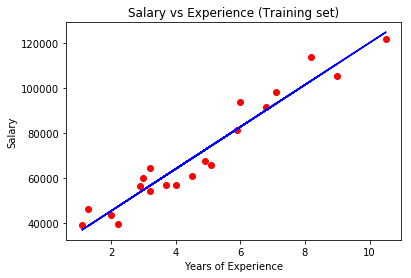

In [78]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualizing test set results

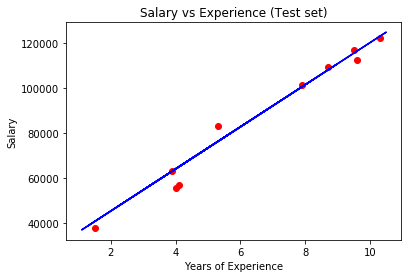

In [64]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Fitting (training) simple linear model (using sklearn)

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting test set results

In [80]:
y_pred = regressor.predict(X_test)

## Visualizing training set results

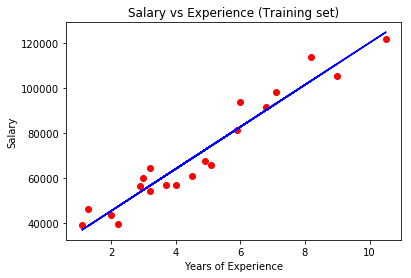

In [81]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualizing test set results

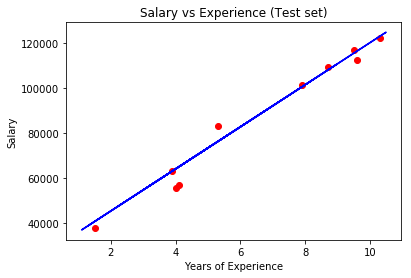

In [82]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## But let's try out our regression on other dataset
(just as quick demonstration, so we will omit splitting, etc.)

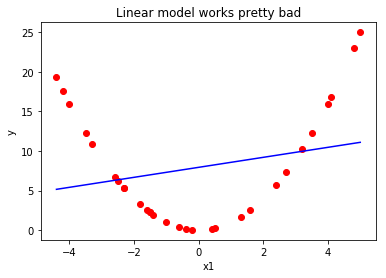

In [83]:
X = (X - 5.5)
y = X ** 2  # "New" datset

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)


plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Linear model works pretty bad')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()